In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import data_process as dp
import os

truncation_choices = [0.9, 0.8, 0.7]
plot_legend = []
for el in truncation_choices:
    plot_legend.append("Cap " + str(el))

df = pd.read_pickle('full_experiment_data.pkl')
print(df.shape[0],"original number of subjects")
for el in truncation_choices:
    print(df[df['probability_truncation'] == el].shape[0], "subjects in %.1lf cap group" % el)
print('')

#Filtering out too many quiz fails
df = df[df['quiz_failed'] < 2]

#Discarding subjects who kept loosing buttons for too long
experiment_total = dp.Decision_Process(df, drop_first_button=False)
suboptimal_subjects = np.array([True if max([(btn[:,1]-btn[:,0]).max() for btn in subj]) > 20 else False for subj in experiment_total.subjects_button_activity])
df = df[~suboptimal_subjects]
print(df.shape[0],"subjects remain after filtering")

experiment_total = dp.Decision_Process(df, drop_first_button=False)
experiment_split = []
for el in truncation_choices:
    truncation_split = df[df['probability_truncation'] == el]
    experiment_split.append(dp.Decision_Process(truncation_split))
    print(truncation_split.shape[0], "subjects in %.1lf cap group remain after filtering" % el)

3632 original number of subjects
1214 subjects in 0.9 cap group
1203 subjects in 0.8 cap group
1215 subjects in 0.7 cap group

3390 subjects remain after filtering
1151 subjects in 0.9 cap group remain after filtering
1125 subjects in 0.8 cap group remain after filtering
1114 subjects in 0.7 cap group remain after filtering


## Does failure of the last outcome lead to more press time as compared to it being success?


In [3]:
totalPeople = df.shape[0]
totalPeople

3390

In [4]:
df.iloc[0]

subjectID                                                           4610916
prolificID                                         5c71b63c4aa8ec0001f2bfc4
probability_truncation                                                  0.8
inst_time                                                             26451
tut_time                                                              23471
date                      Thu Jun 23 2022 15:35:22 GMT-0400 (Eastern Day...
total_win                                                                62
quiz_failed                                                               0
practice_data             [{'press_number': 0, 'button_number': 0, 'curr...
press_data                [{'press_number': 0, 'button_number': 0, 'curr...
feedback                                                               none
Name: 0, dtype: object

In [5]:
failPressTime = []
successPressTime = []
prevOutcome = -1
for j in range(totalPeople):
    try:
        for i in range(len(df.loc[j, 'press_data'])):
            # print(df.loc[0, 'press_data'][i])
            if prevOutcome == 0:
                failPressTime.append(df.loc[j, 'press_data'][i]['press_time'])
            elif prevOutcome == 1:
                successPressTime.append(df.loc[j, 'press_data'][i]['press_time'])
            prevOutcome = df.loc[j, 'press_data'][i]['outcome']
    except:
        continue

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from pingouin import compute_effsize

### T-test

- We intend to preform a t-test because it serves as a suitable tool for comparing means of two indeoendent groups:
  - Group 1: Last Outcome is a failure
  - Group 2: Last Outcome is a success

- Null Hypothesis: There is no difference between the mean press-times of both the groups. 
- Alternative Hypothesis: There is a significant difference between the mean press-times of both the groups. 
- After conducting the t-test, if the resulting p-value is less than a predetermined significance level (commonly 0.05), then we would reject the null hypothesis and conclude that there is a significant difference in means. Conversely, if the p value is greater than the significance level, we would fail to reject the null hypothesis, indicating no significant difference between the groups

In [7]:
t_stat, p_value = ttest_ind(failPressTime, successPressTime)
threshold = 0.05
print(f"P-Value: {p_value:}")
if p_value < threshold:
    print("t-test: Reject null hypothesis")
else:
    print("t-test: Failed to reject null hypothesis")

P-Value: 1.7379366708488442e-232
t-test: Reject null hypothesis


The significance level (alpha) is directly related to the confidence level in hypothesis testing. A  significance level of 0.05 corresponds to a 95% confidence level, which means that if we reject the null hypothesis at this significance level, we are saying that we are 95% confident that the result is not due to random chance, but rather indicates a true difference or relationship.

However, it's important to note that there's a trade-off between Type I and Type II errors. A Type I error occurs when we reject the null hypothesis when it is actually true (false positive), while a Type II error occurs when we fail to reject the null hypothesis when it is actually false (false negative). By lowering the significance level (e.g., using alpha = 0.01), we decrease the likelihood of committing a Type I error, but increase the likelihood of committing a Type II error. Conversely, by increasing the significance level (e.g., using alpha = 0.10), we increase the likelihood of committing a Type I error but decrease the likelihood of committing a Type II error.

In [8]:
df['press_data']

0       [{'press_number': 0, 'button_number': 0, 'curr...
1       [{'press_number': 0, 'button_number': 0, 'curr...
2       [{'press_number': 0, 'button_number': 0, 'curr...
3       [{'press_number': 0, 'button_number': 0, 'curr...
4       [{'press_number': 0, 'button_number': 0, 'curr...
                              ...                        
3627    [{'press_number': 0, 'button_number': 0, 'curr...
3628    [{'press_number': 0, 'button_number': 0, 'curr...
3629    [{'press_number': 0, 'button_number': 0, 'curr...
3630    [{'press_number': 0, 'button_number': 0, 'curr...
3631    [{'press_number': 0, 'button_number': 0, 'curr...
Name: press_data, Length: 3390, dtype: object

In [9]:
# print length of each list failPressTime and successPressTime
print(len(failPressTime))
print(len(successPressTime))

# print total unique values in each list
print(len(set(failPressTime)))
print(len(set(successPressTime)))

# max value in each list
print(max(failPressTime))
print(max(successPressTime))

# min value in each list
print(min(failPressTime))
print(min(successPressTime))

# get the index of these values
print(failPressTime.index(max(failPressTime)))
print(successPressTime.index(max(successPressTime)))

print(failPressTime.index(min(failPressTime)))
print(successPressTime.index(min(successPressTime)))



136768
179631
5288
4895
691568
199231
0
-324


130672
131310
129342
51092


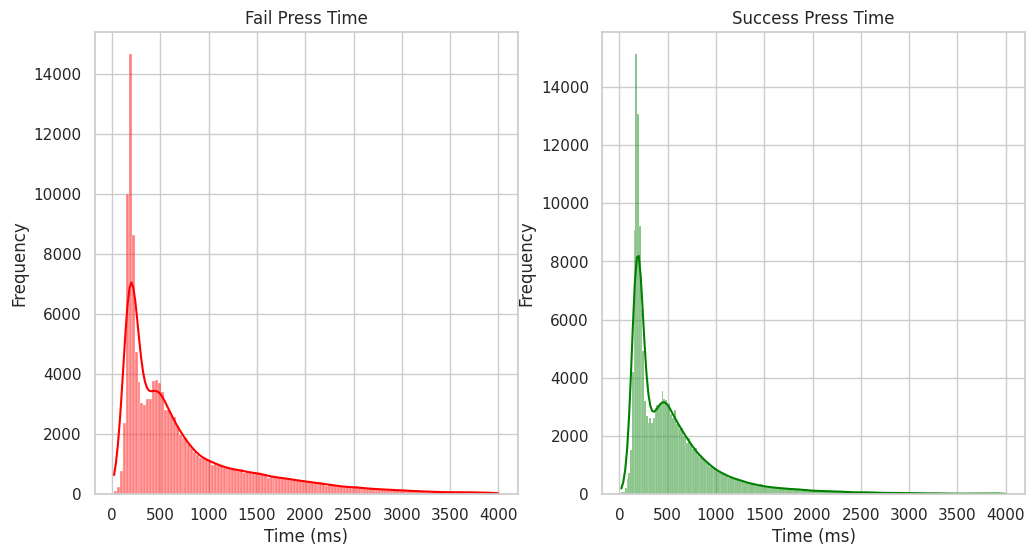

In [10]:
# outliers, values > 50 and < 2000 accepted
failPressTime = [x for x in failPressTime if x > 20 and x < 4000]
successPressTime = [x for x in successPressTime if x > 20 and x < 4000]

# now we can plot the data
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(failPressTime, color='red', kde=True)
plt.title("Fail Press Time")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.histplot(successPressTime, color='green', kde=True)
plt.title("Success Press Time")
plt.xlabel("Time (ms)")
plt.ylabel("Frequency")
plt.show()


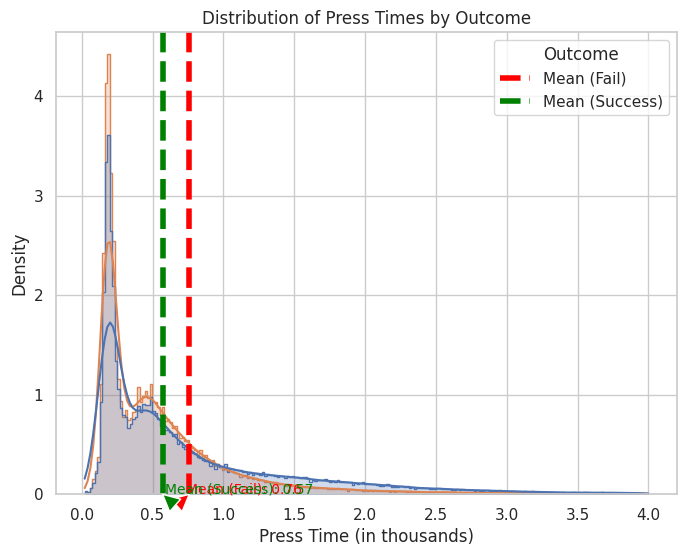

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming failPressTime and successPressTime are pandas Series or lists
df = pd.DataFrame({
    'PressTime': [i/1000 for i in failPressTime + successPressTime],  # Divide each press time by 1000
    'Outcome': ['Fail']*len(failPressTime) + ['Success']*len(successPressTime)
})

# fig, ax = plt.subplots(figsize=(8, 6))
# sns.histplot(df, x='PressTime', hue='Outcome', element='step', stat='density', common_norm=False, kde=True, ax=ax)
# ax.set(title='Distribution of Press Times by Outcome', xlabel='Press Time (in thousands)', ylabel='Density')

# for outcome, color, label in [('Fail', 'red', 'Mean (Fail)'), ('Success', 'green', 'Mean (Success)')]:
#     mean = df[df['Outcome'] == outcome]['PressTime'].mean()
#     ax.axvline(x=mean, color=color, linestyle='dashed', linewidth=4, label=label)
#     ax.annotate(f'{label}: {mean:.2f}', xy=(mean, 0), xytext=(mean + 0.01 if color == 'red' else mean - 0.02, 0.005),
#                 arrowprops=dict(facecolor=color, shrink=0.05), color=color, fontsize=10)

# ax.legend(title='Outcome')
# plt.show()


# df = pd.DataFrame({
#     'PressTime': [i/1000 for i in failPressTime + successPressTime],  # Divide each press time by 1000
#     'Outcome': ['Fail']*len(failPressTime) + ['Success']*len(successPressTime)
# })

fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df, x='PressTime', hue='Outcome', element='step', stat='density', common_norm=False, kde=True, ax=ax)
ax.set(title='Distribution of Press Times by Outcome', xlabel='Press Time (in thousands)', ylabel='Density')

for outcome, color, label in [('Fail', 'red', 'Mean (Fail)'), ('Success', 'green', 'Mean (Success)')]:
    mean = df[df['Outcome'] == outcome]['PressTime'].mean()
    ax.axvline(x=mean, color=color, linestyle='dashed', linewidth=4, label=label)
    # Adjust the position of the label based on its length and the mean value
    label_position = mean - 0.02 if color == 'red' else mean + 0.02
    ax.annotate(f'{label}: {mean:.2f}', xy=(mean, 0), xytext=(label_position, 0.005),
                arrowprops=dict(facecolor=color, shrink=0.05), color=color, fontsize=10)

ax.legend(title='Outcome')
plt.show()

In [15]:
# print means
print("Mean of Fail Press Time: ", np.mean(failPressTime))
print("Mean of Success Press Time: ", np.mean(successPressTime))

Mean of Fail Press Time:  759.0241809267377
Mean of Success Press Time:  570.3251347235569


### Shapiro Wilk Test

In [12]:
t_stat, p_value = shapiro(failPressTime)
threshold = 0.05
print(f"P-Value: {p_value:}")
if p_value < threshold:
    print("Sample does not look Gaussian")
else:
    print("Sample looks Gaussian")

t_stat, p_value = shapiro(successPressTime)
threshold = 0.05
print(f"P-Value: {p_value:}")
if p_value < threshold:
    print("Sample does not look Gaussian")
else:
    print("Sample looks Gaussian")


P-Value: 1.6270797676647652e-140
Sample does not look Gaussian
P-Value: 6.453401138142392e-155
Sample does not look Gaussian


/tmp/ipykernel_2463071/3632499340.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 134817.
  t_stat, p_value = shapiro(failPressTime)
/tmp/ipykernel_2463071/3632499340.py:9: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 177957.
  t_stat, p_value = shapiro(successPressTime)


In [13]:
stat, p = mannwhitneyu(failPressTime, successPressTime)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (failPressTime and successPressTime)')
else:
    print('Different distribution (failPressTime and successPressTime)')


Statistics=13580585607.000, p=0.000
Different distribution (failPressTime and successPressTime)


In [14]:
t_stat, p = ttest_ind(failPressTime, successPressTime)
effSize = compute_effsize(failPressTime, successPressTime, eftype='cohen')
print("T-test Results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p}")
print(f"Effect Size: {effSize}")
if(abs(effSize) < 0.2):
    print("Effect Size is small")
elif(abs(effSize) < 0.5):
    print("Effect Size is medium")
else:
    print("Effect Size is large")

T-test Results:
t-statistic: 83.40616334070081
p-value: 0.0
Effect Size: 0.3011505072660589
Effect Size is medium
